# User Demo 

In [35]:
url = "http://127.0.0.1:5000"
filepath = 'C:\\Users\\reonh\Documents\\NUS\AY2022_S1\Capstone\capstone_21\python_backend\database\lpdlprnet\plate_2.jpg'
folderpath = 'C:\\Users\\reonh\Documents\\NUS\AY2022_S1\Capstone\capstone_21\python_backend\database\lpdlprnet\\'
filename = 'plate.jpg'

## Check Server Status

In [3]:
import requests

response = requests.get( url + "/api/lpdlprnet/" + 'internal')

print(response.json(), flush=True)

{'HTTPStatus': 200, 'status': 'Active'}


## Scenario: Developer needs to recognise license plates for the following images

### Get Predictions

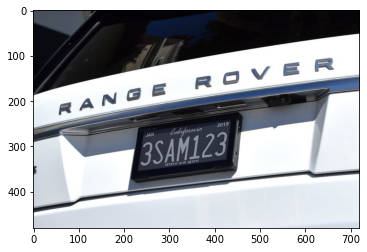

In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

files = [folderpath + 'plate.jpg']

def process(filename: str=None):
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)
    return image

im = process(files[0])


In [112]:
M = im.shape[0]//10
N = im.shape[1]//10
tile_coord = [[x,x+M,y,y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]

In [118]:
ts = im.copy()
a = tile_coord[0][0]
b = tile_coord[0][1]
c = tile_coord[0][2]
d = tile_coord[0][3]

In [134]:
for i,matrix in enumerate(tile_coord):
    a,b,c,d = matrix
    ts = im.copy()
    ts[a:b, c:d] = 255
    plt.imsave(str(i)+'range_rover.jpg', ts)
    

In [33]:
# Used for benchmarking
# [x1, x2, y1, y2] and [x3, x4, y3, y4] 
def calculate_iou_from_coords(bx1, bx2):
    assert (is_bounding_box(bx1) and is_bounding_box(bx2))
    #map list of coordinates into bounding box
    bb1, bb2 = {},{}
    bb1['x1'], bb1['x2'], bb1['y1'], bb1['y2'] = bx1
    bb2['x1'], bb2['x2'], bb2['y1'], bb2['y2'] = bx2

    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

#     print(x_left, y_top, x_right, y_bottom)

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
#     print(iou, intersection_area, bb1_area, bb2_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou
      
    

def is_bounding_box(box):
    return type(box) in [list, tuple, pd.Series, np.ndarray] and len(box) == 4


# [x1, y1, w1, h1] and [x2, y2, w2, h2] 
def calculate_iou_from_dim(bx1, bx2):
  return calculate_iou_from_coords(*list(map(convert_dim_to_coord, [bx1, bx2])))


def convert_dim_to_coord(args):
  x,y,w,h = args
  return [x, x+w, y, y+h]

def chop_image(im, n): 
    """
    Chop image into n segments
    """
    import matplotlib.pyplot as plt
    org = plt.imread(im)
    im = org.copy()
    M = im.shape[0]//n
    N = im.shape[1]//n
    tile_coord = [[x,x+M,y,y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]
    response =[org]
    for i,matrix in enumerate(tile_coord):
        a,b,c,d = matrix
        ts = im.copy()
        ts[a:b, c:d] = 0
        response.append(ts)
    return response
    

In [111]:
plate = plt.imread('C:\\Users\\reonh\\Documents\\NUS\\AY2022_S1\\Capstone\\capstone_21\\python_backend\\database\\lpdlprnet\\plate.jpg')
oplate = plt.imread('C:\\Users\\reonh\\Documents\\NUS\\AY2022_S1\\Capstone\\capstone_21\\python_backend\\triton_client\\lpdnet\\input\\internal\\081021_042837\\0plate.jpg')

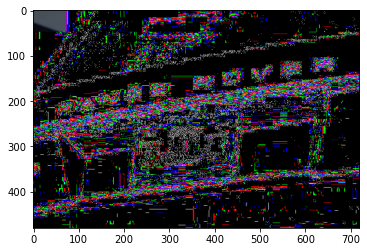

In [115]:
plt.imshow(plate-oplate)

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
responses = pd.read_pickle('python_backend/response')
responses

[{'HTTPStatus': 204, 'file_name': '0plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '10plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '11plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '12plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '13plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '14plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '15plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '16plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '17plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '18plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '19plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '1plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '20plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '21plate.jpg', 'all_bboxes': []},
 {'HTTPStatus': 204, 'file_name': '22plate.jpg', '

In [94]:
conf = {}
for r in responses:
    key = r['file_name'].replace('plate.jpg','')
    try:
        sc = r['all_bboxes'][0]['confidence_score']
    except:
        sc = 0.01
    conf[key] = sc
    

In [95]:
conf

{'0': 0.01,
 '10': 0.01,
 '11': 0.01,
 '12': 0.01,
 '13': 0.01,
 '14': 0.01,
 '15': 0.01,
 '16': 0.01,
 '17': 0.01,
 '18': 0.01,
 '19': 0.01,
 '1': 0.01,
 '20': 0.01,
 '21': 0.01,
 '22': 0.01,
 '23': 0.01,
 '24': 0.01,
 '25': 0.01,
 '26': 0.01,
 '27': 0.01,
 '28': 0.01,
 '29': 0.01,
 '2': 0.01,
 '30': 0.01,
 '31': 0.01,
 '32': 0.01,
 '33': 0.9335149526596069,
 '34': 1.0344057083129883,
 '35': 0.9507833123207092,
 '36': 0.01,
 '37': 0.01,
 '38': 0.01,
 '39': 0.01,
 '3': 0.01,
 '40': 0.01,
 '41': 0.01,
 '42': 0.01,
 '43': 0.01,
 '44': 0.01,
 '45': 1.2837499380111694,
 '46': 0.01,
 '47': 0.01,
 '48': 0.01,
 '49': 0.01,
 '4': 0.01,
 '50': 0.01,
 '51': 0.01,
 '52': 0.9773238301277161,
 '53': 0.01,
 '54': 0.01,
 '55': 0.01,
 '56': 1.4288040399551392,
 '57': 0.01,
 '58': 0.01,
 '59': 0.01,
 '5': 0.01,
 '60': 0.01,
 '61': 0.01,
 '62': 0.01,
 '63': 0.01,
 '64': 0.01,
 '65': 0.01,
 '66': 1.2618190050125122,
 '67': 0.01,
 '68': 0.01,
 '69': 0.01,
 '6': 0.01,
 '70': 0.01,
 '71': 0.01,
 '72': 0.01,

In [39]:
chunks = chop_image(folderpath + 'plate_2.jpg', 10)

In [96]:
def conf_color(x):
    return 255/x



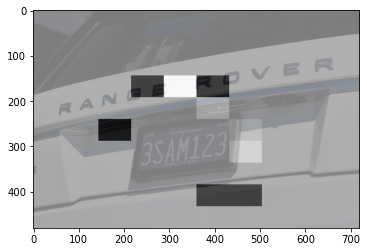

In [100]:
org = plt.imread(folderpath + 'plate.jpg')
n = 10
im = org.copy()
M = im.shape[0]//n
N = im.shape[1]//n
tile_coord = [[x,x+M,y,y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]
response =[]
for i,matrix in enumerate(tile_coord):
    a,b,c,d = matrix
    im[a:b,c:d] = conf_color(conf[str(i)])
plt.imshow(org)
plt.imshow(im, alpha=0.8)


In [16]:
import requests

baseURL = url


request_files=[ ('image',(files[0],open(files[0],'rb'),'image/jpeg')) , ('image',(files[1],open(files[1],'rb'),'image/jpeg'))]
headers = {}
payload = {'filename':['plate.jpg', 'plate_2.jpg']}

response = requests.post( baseURL + "/api/lpdlprnet/internal", headers=headers, data=payload, files=request_files)
print(response.json()['0']['0_lpr']['license_plate'])
print(response.json()['1']['0_lpr']['license_plate'])



3SAM123
FE002CA


### Can we explain this output?

In [17]:
import requests

baseURL = url
filename = filename

filepath = filepath


files=[ ('image',(filename,open(filepath,'rb'),'image/jpeg')) ]
headers = {}

response = requests.post( baseURL + "/api/lpdlprnet/explain/internal", headers=headers, data=payload, files=files)

In [18]:
from IPython.display import Markdown, display

display(Markdown(response.json()['explain_markdown']))

## Under the Hood



Under the hood, there are 2 major steps to License Plate Recognition. The first is _Detection_, and the second is _Recognition_.



Given this original base image:



![placeholder1](http://localhost:5000//api/get_image?path=triton_client/lpdnet/input/internal/012932/plate.jpg)



### Preprocessing



As with all image processing problems, the first step is to process the image.

Preprocessing includes a few key steps:



    1. The image is resized into (3, 480, 640)

    2. Mean subtraction and normalization is then performed on the image



The final processed image is then sent to the triton server for inference



### Detection



After being sent to the triton server for inference, we perform detection to detect the bounding boxes of license plates in the image using Nvidia's LPDNet which is based on NVIDIA's DetectNet_v2 detector with ResNet18 as the feature extractor.



This LPDNet inference returns raw output tensors before final post processing is done containing the following steps:



    1. Denormalize the output bbox coordinates which converts bbox from relative coordinates to absolute coordinates.

    2. Threshold the coverage output to get the valid indices for the bboxes based on a pre set coverage threshold.

    3. Cluster the filterred valid boxes using DBSCAN.

    4. Convert filtered boxes into KittiBbox output format with the final absolute coordinates of bbox and confidence scores

    5. Final post processing occurs to return the bbox coordinates and confidence scores for each input image



After postprocessing occurs, we return a bounding box with confidence scores as output.



<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>confidence_score</th>
      <th>exp_bbox</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>4.664563</td>
      <td>[1050.6475830078125, 371.9031982421875, 1196.3863525390625, 431.1545715332031]</td>
    </tr>
  </tbody>
</table>



The Bbox coordinates are then used to draw the final detected licence plates.



![placeholder2](http://localhost:5000//api/get_image?path=triton_client/lpdnet/output/internal/012932/overlay_lpdnet_plate.jpg)



These detections are key in the overall goal of license plate recognition (LPR) because LPR performs best when there is little noise in the form of external features other than the license plate.



We use the bounding box to crop into the the license plate, which is then sent to the last phase for license plate recognition



![placeholder3](http://localhost:5000//api/get_image?path=triton_client/lpdnet/output/internal/012932/exp_plate.jpg)



### Recognition



License plate recognition aims to recognise characters in license plates. It utilises a sequence classification model with a ResNet backbone.



After obtaining the sequence output from the license plate, the LPRNet makes use of _best path decoding method_ in order to decode the sequence output of the model into the final predicted characters.



These characters are then output as the final licence plate character.



<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>FE002CA</th>
      <th>license_plate</th>
      <th>confidence_scores</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td></td>
      <td>F</td>
      <td>0.999481</td>
    </tr>
    <tr>
      <td></td>
      <td>E</td>
      <td>0.999929</td>
    </tr>
    <tr>
      <td></td>
      <td>0</td>
      <td>0.999951</td>
    </tr>
    <tr>
      <td></td>
      <td>0</td>
      <td>0.999968</td>
    </tr>
    <tr>
      <td></td>
      <td>2</td>
      <td>0.997558</td>
    </tr>
    <tr>
      <td></td>
      <td>C</td>
      <td>0.995367</td>
    </tr>
    <tr>
      <td></td>
      <td>A</td>
      <td>0.994432</td>
    </tr>
  </tbody>
</table>


### How to write this code?

In [94]:
import requests

baseURL = url


files=[ ('image',(filename,open(filepath,'rb'),'image/jpeg')) ]
headers = {}

response = requests.post( baseURL + "/api/lpdlprnet/internal", headers=headers, data=payload, files=files)
response.json()

{'0': {'0_lpr': {'confidence_scores': [0.9994813203811646,
    0.9999290704727173,
    0.9999510049819946,
    0.9999681711196899,
    0.9975576400756836,
    0.9953673481941223,
    0.9944321513175964],
   'license_plate': 'FE002CA'},
  'HTTPStatus': 200,
  'all_bboxes': [{'0_bbox': [1050.6475830078125,
     371.9031982421875,
     1196.3863525390625,
     431.1545715332031],
    'confidence_score': 4.664562702178955}],
  'file_name': 'plate.jpg',
  'overlay_image': 'triton_client/lpdnet/output/internal/024009/overlay_lpdnet_plate.jpg'}}